<a href="https://colab.research.google.com/github/DataEtnos/DataEtnos/blob/main/SARIMA_ARIMA_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [2]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
df =  pd.read_excel("/content/energy.xlsx",index_col="DATE",parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [4]:
df.shape

(408, 1)

In [5]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [6]:
df.index.min(),df.index.max(),df.index.nunique()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'), 408)

<Axes: xlabel='DATE'>

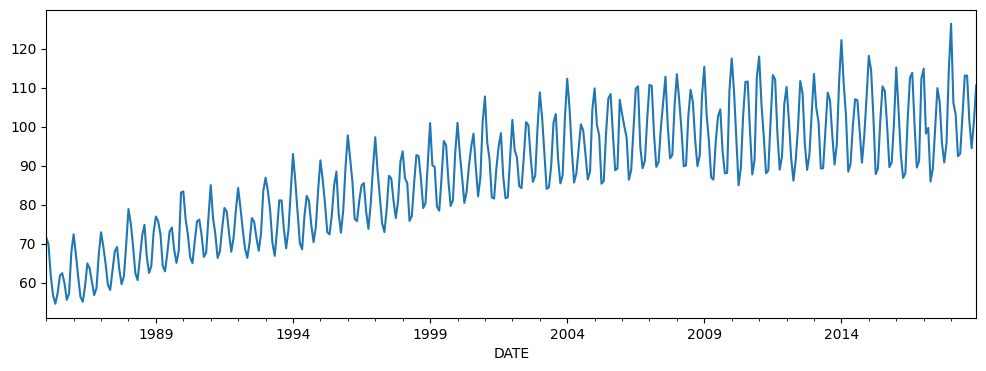

In [7]:
df.columns= ["Produção"]

df["Produção"].plot(figsize=(12,4))

In [16]:
df.head()

,Produção
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


<Figure size 1200x800 with 0 Axes>

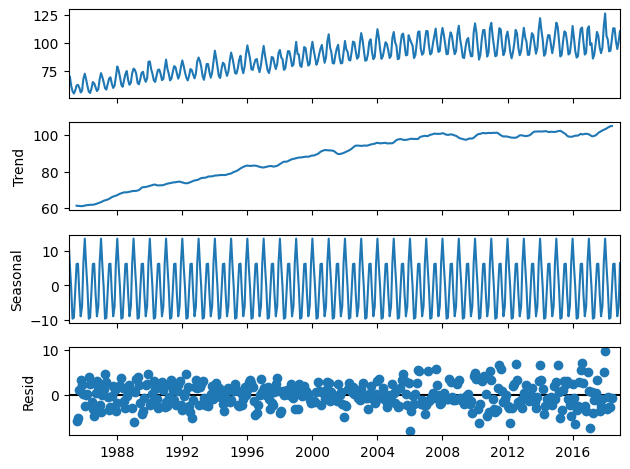

In [8]:
resultado =  seasonal_decompose(df)
fig = plt.figure(figsize=(12,8))
fig = resultado.plot()

In [9]:
result =  adfuller(df["Produção"].dropna())
print(f"Estatística ADF: {result[0]}")
print(f"p-valor: {result[1]}")


Estatística ADF: -2.252399047046594
p-valor: 0.18777984601967806


In [10]:
#foi adicionado a função diff tirando a diferença entre uma linha e outra tornando assim uma nova "base" e assim anulando a hipotese nula
result =  adfuller(df["Produção"].diff().dropna())
print(f"Estatística ADF: {result[0]}")
print(f"p-valor: {result[1]}")


Estatística ADF: -7.450892277526341
p-valor: 5.67456995585561e-11


In [18]:
#Demonstração de retirando a difereção mes a mes para ajustar os parametros .
df.diff().head()

,Produção
DATE,
1985-01-01,NaN
1985-02-01,-1.8050
1985-03-01,-8.1080
1985-04-01,-4.9311
1985-05-01,-2.1314


In [19]:
fit_arima = auto_arima(df, d=1 , start_p = 1, start_q  =   1 ,max_p = 3,seasonal=True ,  m = 6 ,D = 1,start_P= 1 ,start_Q= 1 ,max_P = 2 ,nax_Q =  2,
                       information_criterion="aic",trance =  True, erro_action =  "ignore",
                       Stepwise = True)


In [12]:
print(fit_arima.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Thu, 25 Jul 2024   AIC                           1866.400
Time:                                        10:47:39   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.

In [13]:
#Definido o melhor parametro

fit_arima


ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 6),
      suppress_warnings=True, with_intercept=False)

In [20]:
model =  SARIMAX(df,order=(1,1,1),seasonal_order=(1,1,2,6))

resultado_sarimax = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
print(resultado_sarimax.summary())

                                       SARIMAX Results                                        
Dep. Variable:                               Produção   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Thu, 25 Jul 2024   AIC                           1866.400
Time:                                        11:21:00   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.

In [23]:
predict =  resultado_sarimax.get_prediction(start = -12)
predicao_media =  predict.predicted_mean


In [31]:
intervalo_confianca = predict.conf_int()
limite_abaixo = intervalo_confianca.iloc[:, 0]
limite_acima = intervalo_confianca.iloc[:, 1]
limite_abaixo[0], limite_acima[0]


(115.1447404570401, 124.45517675290846)

In [33]:
predicao_media[0]

119.79995860497428

In [35]:
data_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

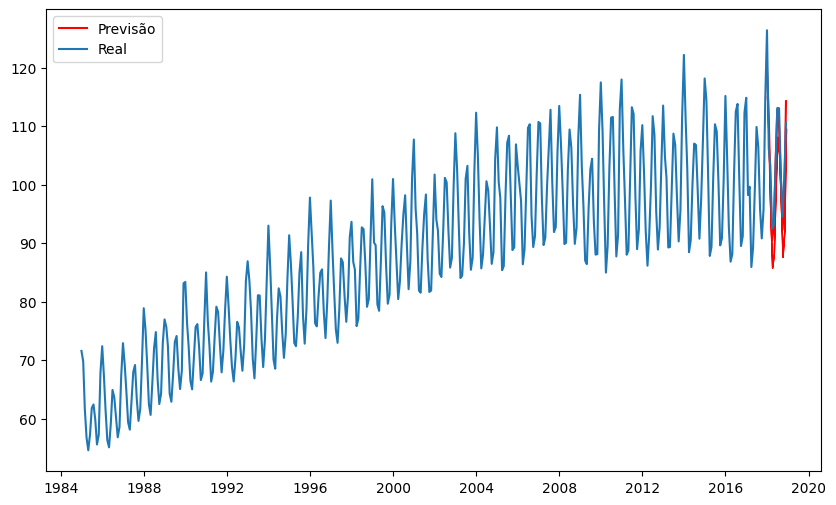

In [39]:
plt.figure(figsize=(10,6))
plt.plot(data_previsao, predicao_media.values,color = "red",label = "Previsão")
plt.fill_between(data_previsao , limite_abaixo,limite_abaixo, color = 'red')
plt.plot(datas, df.values, label = "Real")
plt.legend()
plt.show()

In [43]:
mae =  mean_squared_error(df[-12:].values,predicao_media.values)
print(mae)

11.739385698460397


In [54]:
forescast =  resultado_sarimax.get_forecast(steps = 12)
forescast_media =  forescat.predicted_mean
forescast_media.size

12

In [55]:
intervalo_confianca = forescat.conf_int()
intervalo_abaixo = intervalo_confianca.iloc[:, 0]
intervalo_acima = intervalo_confianca.iloc[:, 1]

intervalo_abaixo[10], intervalo_acima[10]


(91.38813005236821, 103.10930985132882)

In [56]:
forescast_media[10]

97.24871995184851

In [63]:
data_forescast =  np.asarray(forescast_media.index)
pred_dates = np.asarray(predicao_media.index)

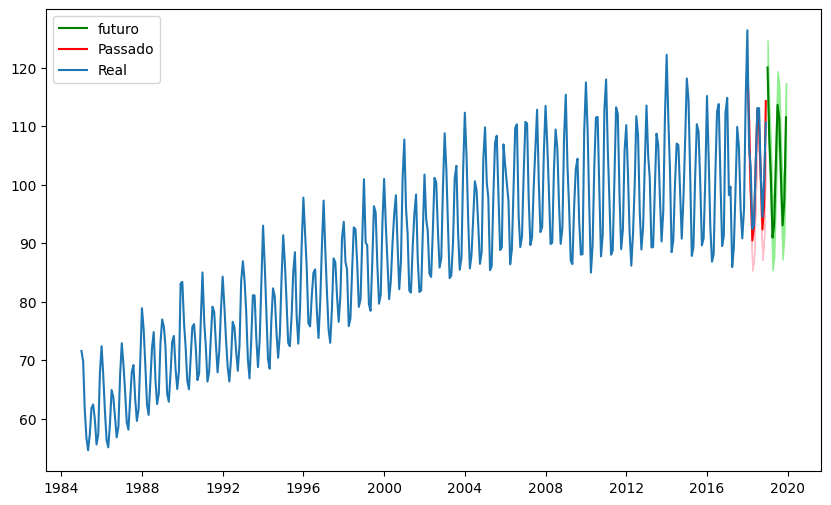

In [70]:
dates =  np.asarray(df.index)

plt.figure(figsize=(10,6))
plt.plot(data_forescast, forescast_media.values,color = "green",label = "futuro")
plt.fill_between(data_forescast,intervalo_abaixo, intervalo_acima, color = "lightgreen")

plt.plot(data_previsao , predicao_media.values,color = "red",label = "Passado")
plt.fill_between(data_previsao , limite_abaixo,limite_abaixo, color = 'pink')

plt.plot(dates, df.values, label = "Real")
plt.legend()
plt.show()

